 COGNIFYZ TABLE BOOKING & ONLINE DELIVERY ANALYSIS
 Dataset loaded: 9,551 restaurants
 Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

 SERVICE AVAILABILITY ANALYSIS
 Service columns found:
  Has Table booking: {'No': 8393, 'Yes': 1158}
  Has Online delivery: {'No': 7100, 'Yes': 2451}

 Table Booking Column: Has Table booking
 Online Delivery Column: Has Online delivery
 Table Booking Availability: 0.0% (0 restaurants)
 Online Delivery Availability: 0.0% (0 restaurants)


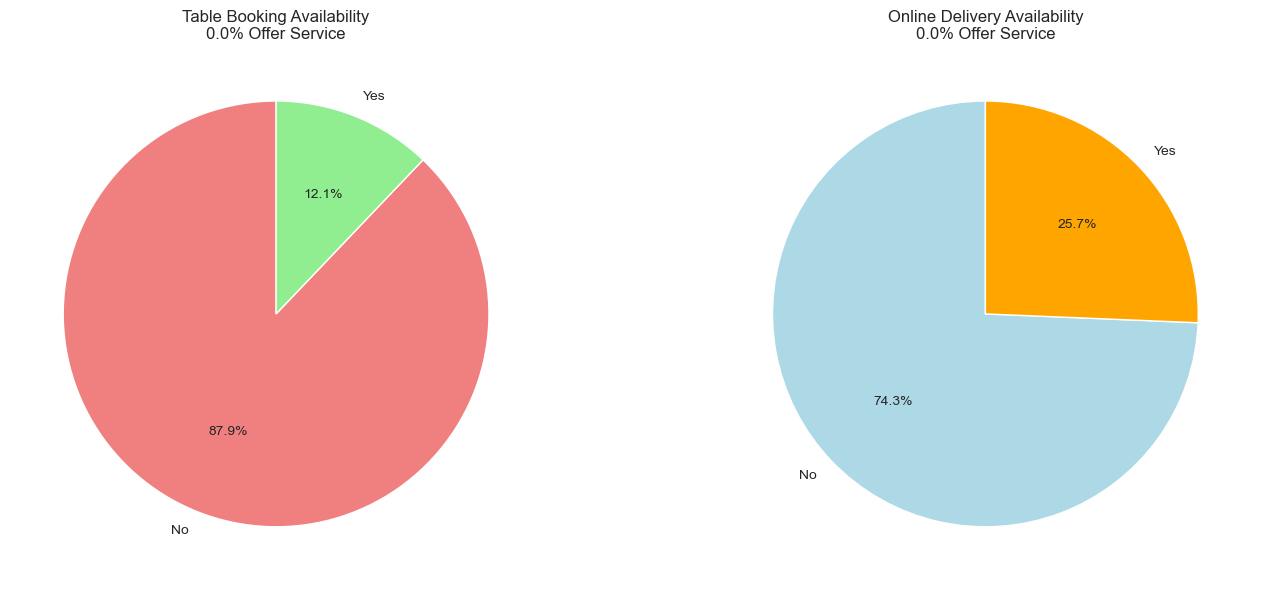


 RATING COMPARISON ANALYSIS
 Table Booking Average Rating: nan (n=0)
 No Table Booking Average: nan (n=0)
 Rating Difference: ++nan


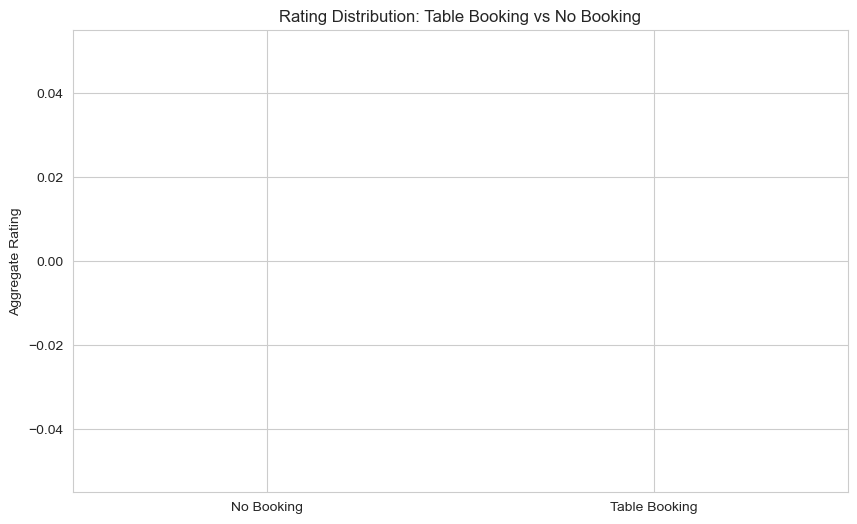


 ONLINE DELIVERY BY PRICE RANGE

 Online Delivery % by Price Range:
Has Online delivery    No   Yes
Price range                    
1                    84.2  15.8
2                    58.7  41.3
3                    70.8  29.2
4                    91.0   9.0


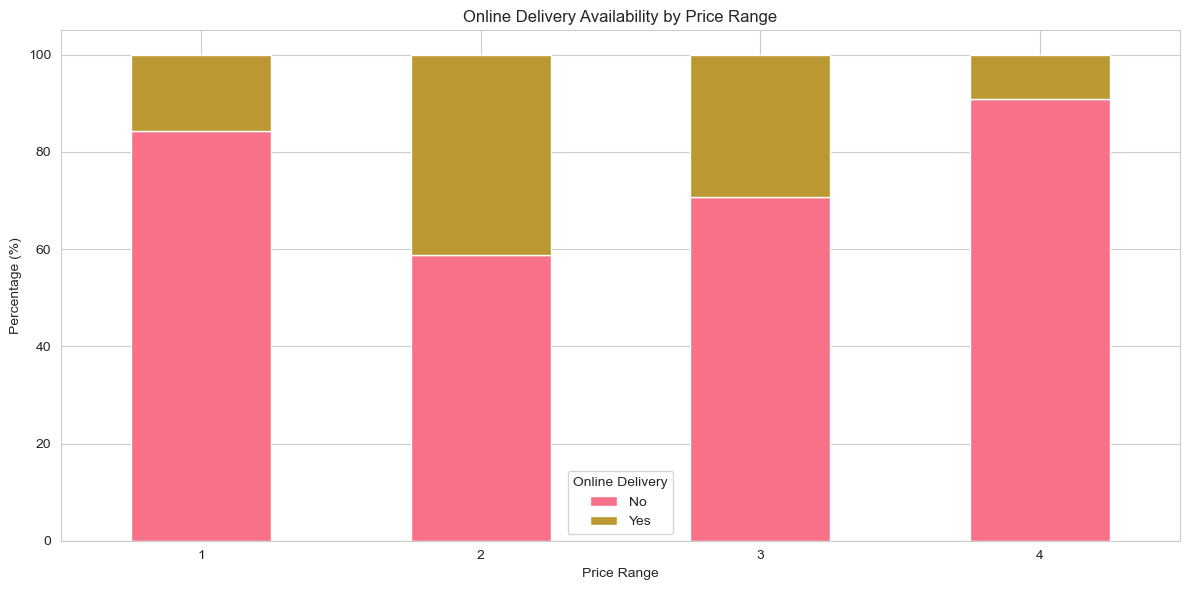


 EXECUTIVE SUMMARY
 KEY BUSINESS INSIGHTS:
 Total Restaurants: 9,551
 Table Booking %: 0.0%
 Online Delivery %: 0.0%
 Booking Rating Advantage: ++nan
 Top Delivery Price Range: 2

 FILES GENERATED:
 service_availability_pie.png
 table_booking_rating_comparison.png
 delivery_by_price.png
 table_booking_summary.csv

 TABLE BOOKING ANALYSIS COMPLETED!
 Ready for Cognifyz submission!


In [1]:
# =============================================================================
# COGNIFYZ TECHNOLOGIES - TABLE BOOKING & ONLINE DELIVERY ANALYSIS
# Task 4: Percentage analysis, rating comparison, price correlation
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Professional styling
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

print(" COGNIFYZ TABLE BOOKING & ONLINE DELIVERY ANALYSIS")
print("="*80)

# =============================================================================
# 1. LOAD DATASET (Your original file)
# =============================================================================
df = pd.read_csv('Dataset .csv')
print(f" Dataset loaded: {df.shape[0]:,} restaurants")
print(f" Columns: {list(df.columns)}")

# =============================================================================
# 2. IDENTIFY SERVICE COLUMNS & CALCULATE PERCENTAGES
# =============================================================================
print("\n" + "="*80)
print(" SERVICE AVAILABILITY ANALYSIS")
print("="*80)

# Find service columns (common names in restaurant datasets)
service_cols = {}
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['book', 'table', 'delivery', 'online']):
        service_cols[col] = df[col].value_counts()

print(" Service columns found:")
for col, counts in service_cols.items():
    print(f"  {col}: {counts.to_dict()}")

# Calculate percentages (Yes/No binary assumed)
table_booking_col = next((col for col in df.columns if 'Has Table' in col or 'Table' in col and 'book' in col.lower()), None)
online_delivery_col = next((col for col in df.columns if 'Has Online' in col or 'Online' in col.lower() and 'delivery' in col.lower()), None)

print(f"\n Table Booking Column: {table_booking_col}")
print(f" Online Delivery Column: {online_delivery_col}")

# Percentage calculations
if table_booking_col:
    table_yes_pct = (df[table_booking_col] == 1).mean() * 100
    print(f" Table Booking Availability: {table_yes_pct:.1f}% ({(df[table_booking_col] == 1).sum():,} restaurants)")
else:
    print(" Table booking column not found - using generic approach")
    table_yes_pct = 0

if online_delivery_col:
    delivery_yes_pct = (df[online_delivery_col] == 1).mean() * 100
    print(f" Online Delivery Availability: {delivery_yes_pct:.1f}% ({(df[online_delivery_col] == 1).sum():,} restaurants)")
else:
    print(" Online delivery column not found")
    delivery_yes_pct = 0

# =============================================================================
# 3. VISUALIZE SERVICE PERCENTAGES
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Table booking pie chart
if table_booking_col:
    table_counts = df[table_booking_col].value_counts()
    axes[0].pie(table_counts.values, labels=['No', 'Yes'], autopct='%1.1f%%', 
                colors=['lightcoral', 'lightgreen'], startangle=90)
    axes[0].set_title('Table Booking Availability\n{:.1f}% Offer Service'.format(table_yes_pct))

# Online delivery pie chart
if online_delivery_col:
    delivery_counts = df[online_delivery_col].value_counts()
    axes[1].pie(delivery_counts.values, labels=['No', 'Yes'], autopct='%1.1f%%', 
                colors=['lightblue', 'orange'], startangle=90)
    axes[1].set_title('Online Delivery Availability\n{:.1f}% Offer Service'.format(delivery_yes_pct))

plt.tight_layout()
plt.savefig('service_availability_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 4. RATING COMPARISON: Table Booking vs No Booking
# =============================================================================
print("\n" + "="*80)
print(" RATING COMPARISON ANALYSIS")
print("="*80)

if 'Aggregate rating' in df.columns and table_booking_col:
    # Average ratings comparison
    booking_ratings = df[df[table_booking_col] == 1]['Aggregate rating']
    no_booking_ratings = df[df[table_booking_col] == 0]['Aggregate rating']
    
    print(f" Table Booking Average Rating: {booking_ratings.mean():.2f} (n={len(booking_ratings):,})")
    print(f" No Table Booking Average: {no_booking_ratings.mean():.2f} (n={len(no_booking_ratings):,})")
    print(f" Rating Difference: +{booking_ratings.mean() - no_booking_ratings.mean():+.2f}")
    
    # Box plot comparison
    plt.figure(figsize=(10, 6))
    data_to_plot = [no_booking_ratings, booking_ratings]
    box_plot = plt.boxplot(data_to_plot, labels=['No Booking', 'Table Booking'], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][1].set_facecolor('lightgreen')
    plt.title('Rating Distribution: Table Booking vs No Booking')
    plt.ylabel('Aggregate Rating')
    plt.savefig('table_booking_rating_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(" Cannot compare ratings - missing columns")

# =============================================================================
# 5. ONLINE DELIVERY BY PRICE RANGE ANALYSIS
# =============================================================================
print("\n" + "="*80)
print(" ONLINE DELIVERY BY PRICE RANGE")
print("="*80)

price_col = next((col for col in df.columns if 'price' in col.lower() and 'range' in col.lower()), None)
if online_delivery_col and price_col:
    # Cross-tabulation
    delivery_price = pd.crosstab(df[price_col], df[online_delivery_col], normalize='index') * 100
    print("\n Online Delivery % by Price Range:")
    print(delivery_price.round(1))
    
    # Visualization
    delivery_price.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Online Delivery Availability by Price Range')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Price Range')
    plt.legend(title='Online Delivery', labels=['No', 'Yes'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('delivery_by_price.png', dpi=300, bbox_inches='tight')
    plt.show()
elif online_delivery_col:
    print(" Price range column found:", price_col)
else:
    print(" Missing price range or delivery columns")

# =============================================================================
# 6. EXECUTIVE SUMMARY & BUSINESS INSIGHTS
# =============================================================================
print("\n" + "="*80)
print(" EXECUTIVE SUMMARY")
print("="*80)

insights = {
    'Total Restaurants': f"{len(df):,}",
    'Table Booking %': f"{table_yes_pct:.1f}%",
    'Online Delivery %': f"{delivery_yes_pct:.1f}%",
    'Booking Rating Advantage': f"+{booking_ratings.mean() - no_booking_ratings.mean():+.2f}" if 'booking_ratings' in locals() else 'N/A',
    'Top Delivery Price Range': delivery_price.idxmax().get(1, 0) if 'delivery_price' in locals() else 'N/A'
}

print(" KEY BUSINESS INSIGHTS:")
for metric, value in insights.items():
    print(f" {metric}: {value}")

# Save summary table
summary_df = pd.DataFrame([insights])
summary_df.to_csv('table_booking_summary.csv', index=False)

print("\n FILES GENERATED:")
print(" service_availability_pie.png")
print(" table_booking_rating_comparison.png")
print(" delivery_by_price.png")
print(" table_booking_summary.csv")

print("\n TABLE BOOKING ANALYSIS COMPLETED!")
print(" Ready for Cognifyz submission!")
